In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [5]:
df.columns

Index(['order_detail_id', 'order_id', 'order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count', 'is_customer_rate',
       'order_detail_status', 'order_detail_goods_num', 'order_detail_amount',
       'order_detail_payment', 'order_detail_discount', 'customer_province',
       'customer_city', 'member_id', 'customer_id', 'customer_gender',
       'member_status', 'is_member_actived', 'goods_id', 'goods_class_id',
       'goods_price', 'goods_status', 'goods_has_discount', 'goods_list_time',
       'goods_delist_time'],
      dtype='object')

In [9]:
# 保留商品列
df.drop(['order_detail_id', 'order_id', 'order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count', 'is_customer_rate',
       'order_detail_status', 'order_detail_goods_num', 'order_detail_amount',
       'order_detail_payment', 'order_detail_discount', 'customer_province',
       'customer_city', 'member_id', 'customer_gender',
       'member_status', 'is_member_actived'], axis=1, inplace=True)

In [15]:
df.shape

(2306871, 8)

In [16]:
df.describe()

,customer_id,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount
count,2.306871e+06,2.306871e+06,2.306871e+06,2.306435e+06,2.306871e+06,2.306871e+06
mean,1.933233e+06,1.558213e+03,1.558213e+03,5.219550e+01,1.091712e+00,8.613616e-02
std,5.538885e+05,7.803288e+02,7.803288e+02,6.325725e+00,3.937307e-01,2.805651e-01
min,1.000000e+06,9.980000e+02,9.980000e+02,-7.997479e+01,0.000000e+00,0.000000e+00
25%,1.436434e+06,1.038000e+03,1.038000e+03,4.960044e+01,1.000000e+00,0.000000e+00
50%,1.929569e+06,1.233000e+03,1.233000e+03,5.390926e+01,1.000000e+00,0.000000e+00
75%,2.457816e+06,1.643000e+03,1.643000e+03,5.485061e+01,1.000000e+00,0.000000e+00
max,2.826574e+06,6.673000e+03,6.673000e+03,9.235260e+01,2.000000e+00,1.000000e+00


In [24]:
groupby_id = pd.DataFrame(df.groupby('goods_id').count().fillna(0))
groupby_id

,customer_id,goods_class_id,goods_price,goods_status,goods_has_discount,goods_list_time,goods_delist_time
goods_id,,,,,,,
998,472943,472943,472943,472943,472943,472943,472943
1008,1972,1972,1972,1972,1972,1972,1972
1013,7624,7624,7624,7624,7624,7624,7624
1018,19172,19172,19172,19172,19172,19172,19172
1023,821,821,821,821,821,821,821
...,...,...,...,...,...,...,...
6653,1,1,1,1,1,1,1
6658,1,1,1,1,1,1,1
6663,6,6,6,6,6,6,6


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


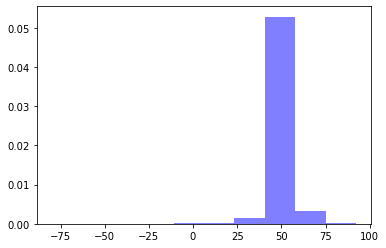

In [21]:
plt.hist(df ['goods_price'],10,normed = 1,facecolor ='blue',alpha = 0.5)

plt.show()

goods_id
998     472943
1008      1972
1013      7624
1018     19172
1023       821
         ...  
6653         1
6658         1
6663         6
6668         1
6673         1
Length: 1037, dtype: int64


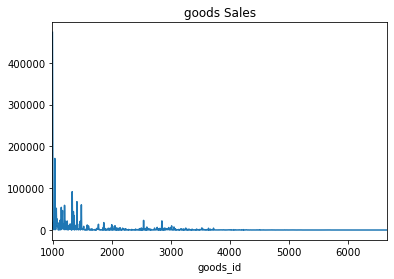

In [29]:
sales_by_good_id = df.groupby('goods_id').size()

print(sales_by_month)

plot_by_good_id = sales_by_good_id.plot(title='goods Sales')